# Ecommerce sale analysis

This project demonstrates an exploratory data analysis (EDA) on e-commerce sales data. The goal is to identify top-selling products, seasonal trends, popular categories, and customer locations. The analysis includes basic statistics, correlation checks, and data visualizations to gain actionable insights.



### Data Source and Analysis Goal

**Data Source:**
This analysis uses a synthetic dataset named `sales_data.csv`, simulating e-commerce transactions. The dataset includes information about orders, products, customers, and locations.

**Analysis Goal and Business Questions:**
The main goal of this analysis is to understand sales patterns, identify key products and customers, and discover potential areas for optimization. The analysis aims to answer the following questions:
1.  Which products generate the most revenue and which are ordered most frequently?
2.  What are the sales trends across different months and days of the week?
3.  Which product categories are the most profitable?
4.  In which locations does the company achieve the highest sales?
5.  Who are the most valuable customers in terms of spending and purchase frequency? (New question)
6.  Are there pairs of products that are frequently bought together? (New question)

### Import essential libraries for data analysis and visualization

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [9]:
df = pd.read_csv("sales_data.csv")

### Initial data analysis

In [10]:
print(df.isnull().sum())
df["order_date"] = pd.to_datetime(df["order_date"])
df.drop_duplicates(inplace=True)
print(df.describe())

order_id             0
product_id           0
product_name         0
category             0
price                0
quantity             0
order_date           0
customer_id          0
customer_location    0
dtype: int64
          order_id   product_id       price     quantity  \
count  1000.000000  1000.000000  1000.00000  1000.000000   
mean    500.500000   105.052000   476.92573     5.006000   
min       1.000000   101.000000    10.12000     1.000000   
25%     250.750000   103.000000   107.74250     3.000000   
50%     500.500000   105.000000   316.83500     5.000000   
75%     750.250000   107.000000   661.89750     7.000000   
max    1000.000000   109.000000  1996.65000     9.000000   
std     288.819436     2.573309   475.16647     2.560179   

                          order_date  customer_id  
count                           1000  1000.000000  
mean   2023-09-08 01:58:14.219999744  1509.083000  
min              2023-01-01 12:05:00  1001.000000  
25%              2023-05-04 01:

### Data transformation

In [26]:
df["total_sales"] = df["quantity"] * df["price"]
df["year"] = df["order_date"].dt.year
df["month"] = df["order_date"].dt.month_name()
df["day_of_week"] = df["order_date"].dt.day_name()

months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

df_2023 = df[df['year'] == 2023].copy()

## Sales analysis

### Top Products

In [12]:
top_sales = (
    df.groupby("product_name")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print(f"Top 10 products by sales:\n {top_sales}")

Top 10 products by sales:
 product_name
Laptop        986564.16
Camera        416549.79
Smartphone    302063.48
Tablet        262460.70
Monitor       172538.20
Printer       123465.82
Headphones    115767.86
Keyboard       40871.47
Mouse          14657.28
Name: total_sales, dtype: float64


### Sales by Category

In [13]:
category_sales = (
    df.groupby("category")["total_sales"].sum().sort_values(ascending=False)
)
print(f"Sales by category:\n {category_sales}")

monthly_sales_2023 = df_2023.groupby("month")["total_sales"].sum().reindex(months)
top_monthly_category_2023 = (
    df_2023.groupby(["month", "category"])["total_sales"].sum().reset_index()
)


best_category_per_month_2023 = top_monthly_category_2023.loc[
    top_monthly_category_2023.groupby("month")["total_sales"].idxmax()
]


best_category_per_month_2023['month'] = pd.Categorical(best_category_per_month_2023['month'], categories=months, ordered=True)
best_category_per_month_2023 = best_category_per_month_2023.sort_values('month')

print("--- Top Category per Month (2023 Only) ---")
print(best_category_per_month_2023)
print("\n")

Sales by category:
 category
Accessories    882289.90
Electronics    819071.32
Appliances     733577.54
Name: total_sales, dtype: float64
--- Top Category per Month (2023 Only) ---
        month     category  total_sales
12    January  Accessories     67914.14
11   February  Electronics     51180.42
21      March  Accessories     66512.61
0       April  Accessories     80308.29
26        May  Electronics     58110.29
20       June  Electronics     62357.07
16       July   Appliances     66596.03
3      August  Accessories     65807.44
33  September  Accessories     47857.29
30    October  Accessories     52479.01
28   November   Appliances     54697.98
8    December  Electronics     66513.13




### Monthly Sales

In [14]:
df['order_month_year'] = df['order_date'].dt.to_period('M')



monthly_sales_trend_all = df.groupby('order_month_year')['total_sales'].sum().sort_index()
top_monthly_category_all = df.groupby(['order_month_year', 'category'])['total_sales'].sum().reset_index()

best_category_per_month_all = top_monthly_category_all.loc[
    top_monthly_category_all.groupby('order_month_year')['total_sales'].idxmax()
].sort_values(by='order_month_year')


monthly_sales_trend = monthly_sales_trend_all.iloc[:-1]
best_category_per_month = best_category_per_month_all.iloc[:-1]


monthly_sales_trend_formatted = monthly_sales_trend.copy()
monthly_sales_trend_formatted.index = monthly_sales_trend_formatted.index.strftime('%Y %B') 

print("--- Monthly Sales Trend (Year-Month) ---")
print(monthly_sales_trend_formatted) 
print("\n")

best_category_per_month_formatted = best_category_per_month.copy()
best_category_per_month_formatted['order_month_year'] = best_category_per_month_formatted['order_month_year'].dt.strftime('%Y %B')

print("--- Top Category per Month (Year-Month) ---")
print(best_category_per_month_formatted) 
print("\n")

--- Monthly Sales Trend (Year-Month) ---
order_month_year
2023 January      155108.89
2023 February     138625.84
2023 March        188174.70
2023 April        170537.68
2023 May          138119.87
2023 June         156358.85
2023 July         165487.92
2023 August       172965.97
2023 September    123159.41
2023 October      123328.69
2023 November     143073.91
2023 December     136435.79
2024 January      133492.30
2024 February     155274.49
2024 March        148709.44
2024 April        169417.75
Name: total_sales, dtype: float64


--- Top Category per Month (Year-Month) ---
   order_month_year     category  total_sales
0      2023 January  Accessories     67914.14
5     2023 February  Electronics     51180.42
6        2023 March  Accessories     66512.61
9        2023 April  Accessories     80308.29
14         2023 May  Electronics     58110.29
17        2023 June  Electronics     62357.07
19        2023 July   Appliances     66596.03
21      2023 August  Accessories     65807.44


### Top Locations

In [15]:
top_locations = (
    df.groupby("customer_location")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print(f"Top 5 locations by sales:\n {top_locations}")

Top 5 locations by sales:
 customer_location
New York        362822.97
Houston         349674.51
Los Angeles     332015.46
Philadelphia    319027.85
San Diego       282251.45
Name: total_sales, dtype: float64


### Mean Order Value

In [16]:
mean_order_value = df["total_sales"].mean()
print(f"Mean order value: {mean_order_value}")

Mean order value: 2434.93876


### Sales by Day of Week

In [17]:
days_sales = df.groupby("day_of_week")["total_sales"].sum().sort_values(ascending=False)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
days_sales = days_sales.reindex(days)
print(f"Sales by day of the week:\n {days_sales}")

Sales by day of the week:
 day_of_week
Monday       348477.84
Tuesday      388714.85
Wednesday    254253.22
Thursday     440401.80
Friday       308108.50
Saturday     383723.70
Sunday       311258.85
Name: total_sales, dtype: float64


### Correlation between Price and Quantity

In [28]:
print("Correlation between price and quantity:")
print(df["price"].corr(df["quantity"]))

Correlation between price and quantity:
0.039042833081252566


Conclusion: No significant correlation was observed between the product price and the ordered quantity.

### Customer Analysis

In [29]:
customer_analysis = df.groupby('customer_id').agg(
    total_spent=('total_sales', 'sum'),
    order_count=('order_id', 'nunique') 
).reset_index()


top_customers_by_spent = customer_analysis.sort_values(by='total_spent', ascending=False).head(10)
print("--- Top 10 Customers by Total Spent ---")
print(top_customers_by_spent)
print("\n")


top_customers_by_orders = customer_analysis.sort_values(by='order_count', ascending=False).head(10)
print("--- Top 10 Customers by Order Count ---")
print(top_customers_by_orders)
print("\n")

--- Top 10 Customers by Total Spent ---
     customer_id  total_spent  order_count
293         1418     26974.93            5
97          1138     26967.90            2
280         1398     26492.43            3
95          1135     25419.42            3
437         1647     21303.84            2
214         1308     20307.67            3
4           1009     20051.76            4
674         1964     18836.66            3
454         1668     17969.85            1
290         1415     17671.63            4


--- Top 10 Customers by Order Count ---
     customer_id  total_spent  order_count
293         1418     26974.93            5
648         1930     16647.04            4
548         1801      3051.82            4
125         1174     10211.01            4
409         1601      7840.58            4
4           1009     20051.76            4
443         1654      3607.65            4
577         1840      4639.72            4
290         1415     17671.63            4
20          103

## Data visualization

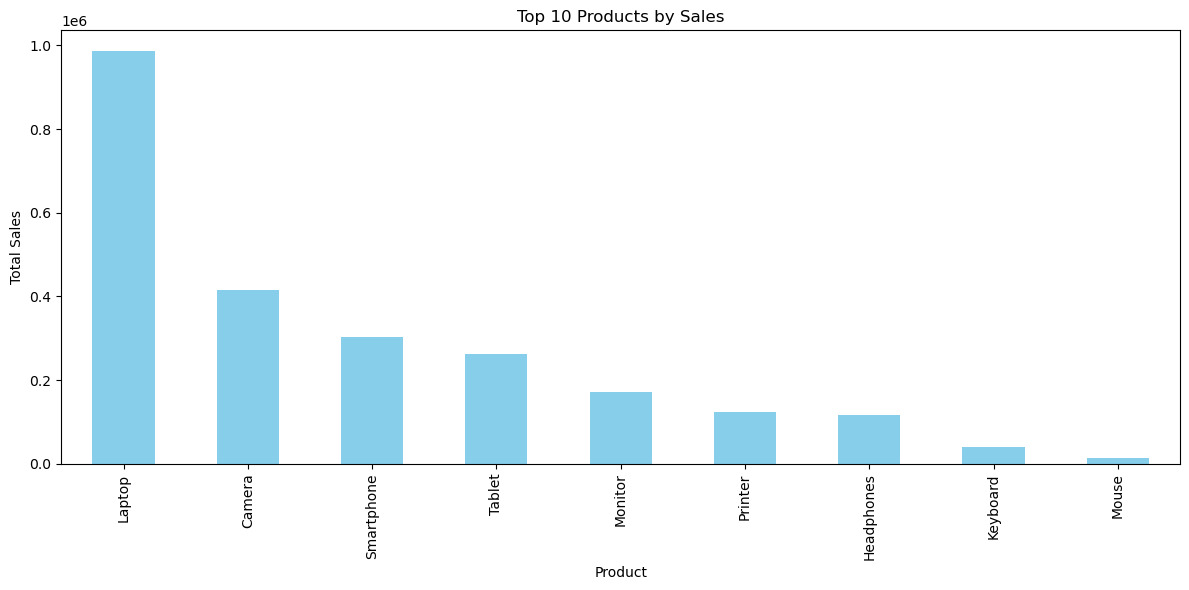

In [19]:
plt.figure(figsize=(12, 6))
top_sales.plot(kind="bar", color="skyblue")
plt.title("Top 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

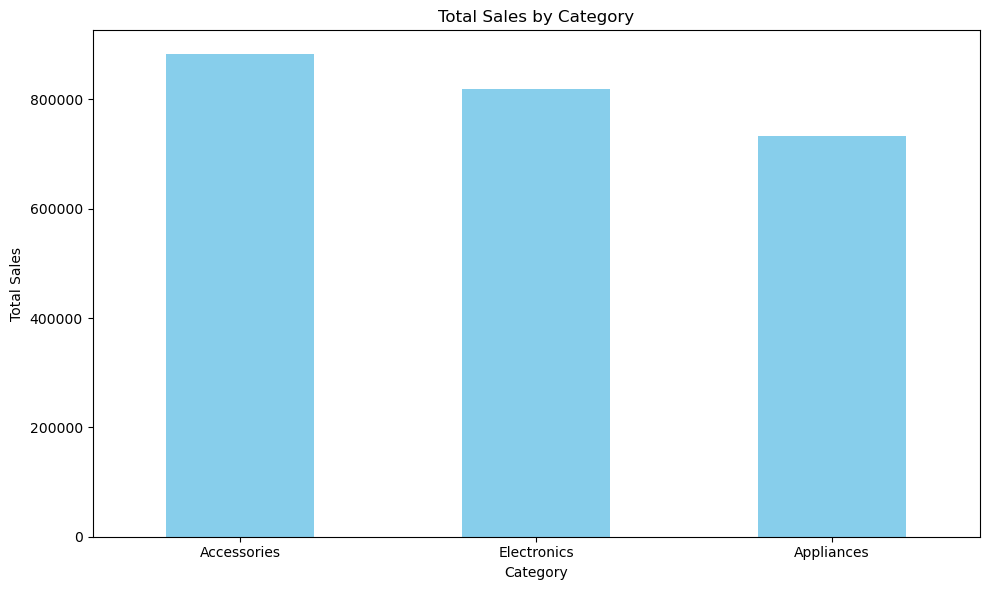

In [20]:
category_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

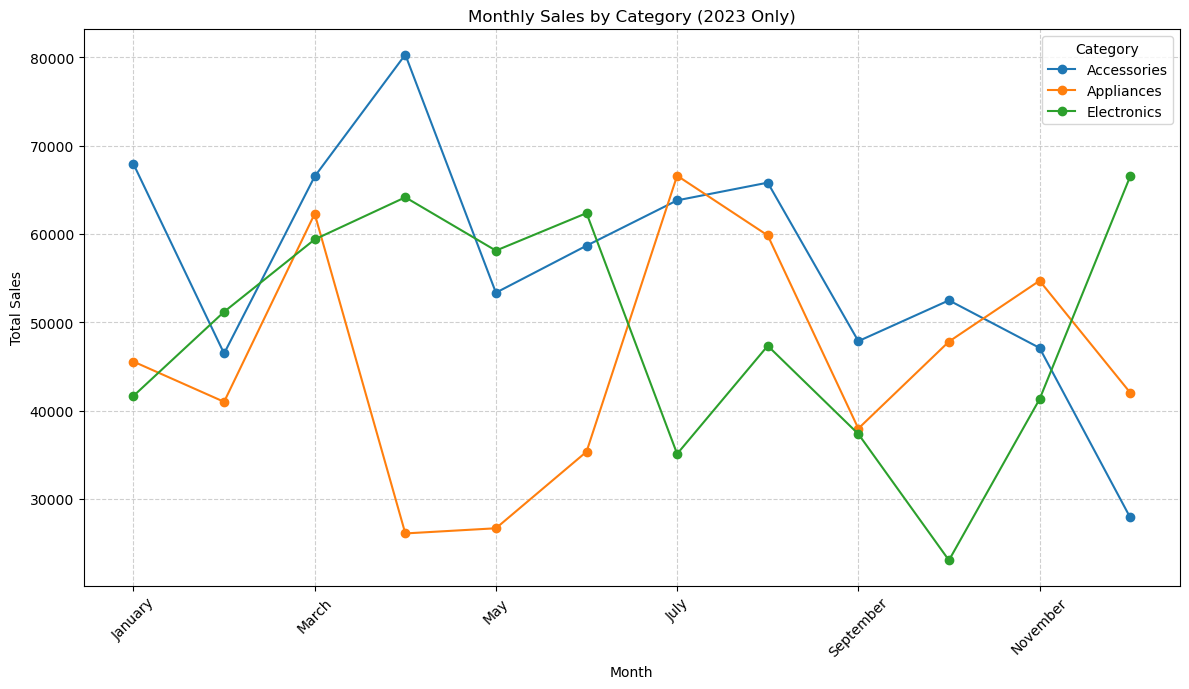

In [27]:
monthly_category_sales = df_2023.groupby(['month', 'category'])['total_sales'].sum().unstack()
monthly_category_sales = monthly_category_sales.reindex(months)

plt.figure(figsize=(12, 7))
monthly_category_sales.plot(kind='line', marker='o', figsize=(12, 7))
plt.title('Monthly Sales by Category (2023 Only)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

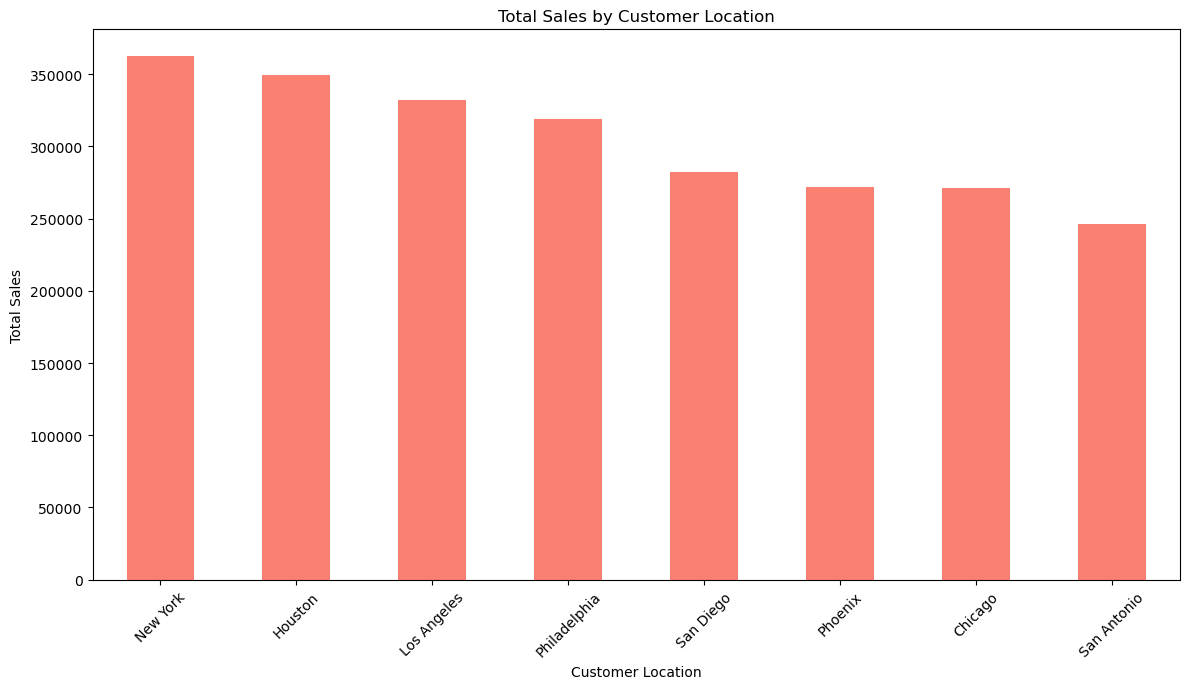

In [22]:
location_sales = df.groupby('customer_location')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
location_sales.plot(kind='bar', color='salmon')
plt.title('Total Sales by Customer Location')
plt.xlabel('Customer Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

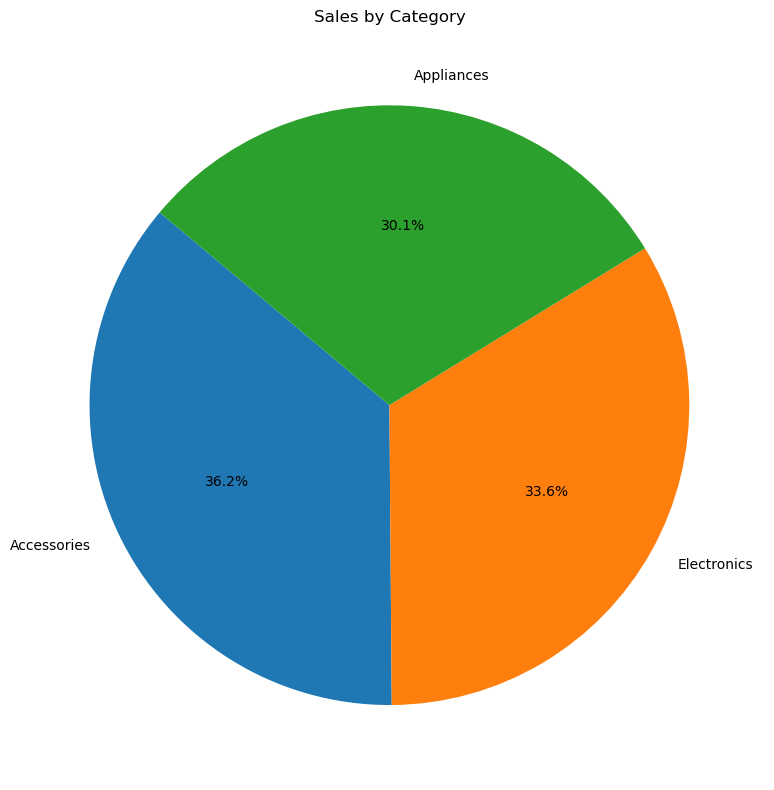

In [23]:
plt.figure(figsize=(8, 8))
category_sales.plot(kind="pie", autopct="%1.1f%%", startangle=140)
plt.title("Sales by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

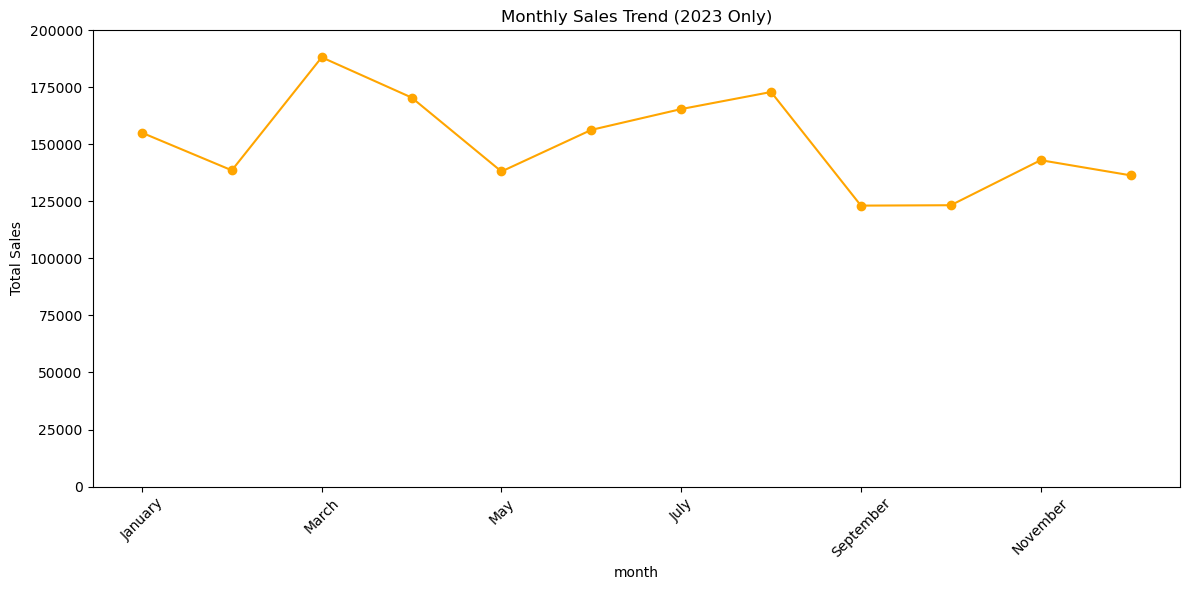

In [24]:


plt.figure(figsize=(12, 6))
monthly_sales_2023.plot(kind="line", marker="o", color="orange") 
plt.ylim(0, 200000)
plt.title("Monthly Sales Trend (2023 Only)") 
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

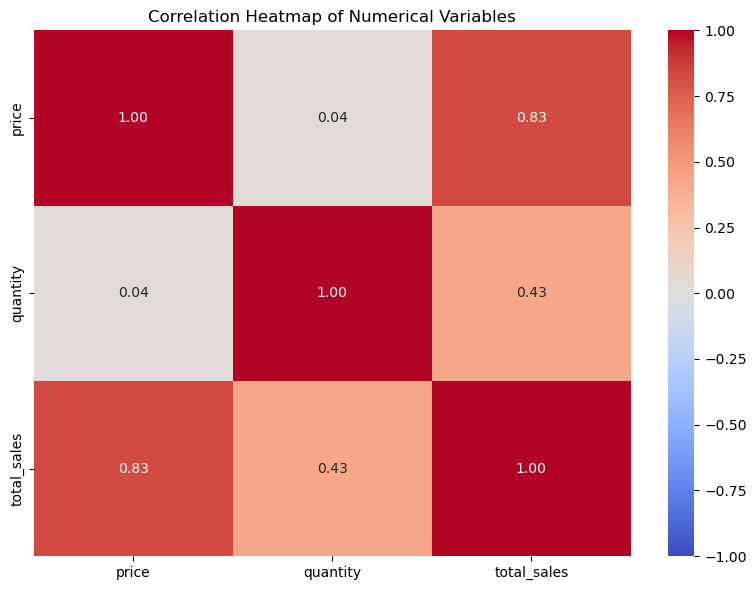

In [25]:
numerical_cols = ['price', 'quantity', 'total_sales']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True,     
            cmap='coolwarm', 
            fmt='.2f',        
            vmin=-1,          
            vmax=1)           

plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

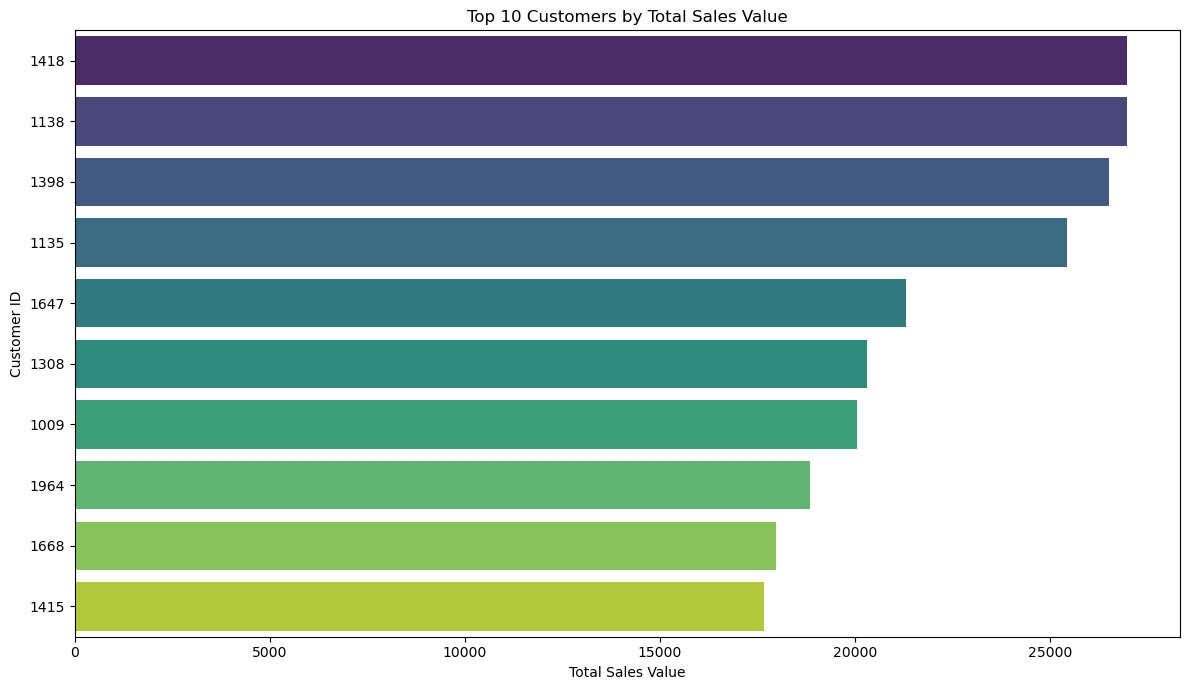

In [39]:
top_customers_by_spent['customer_id_str'] = top_customers_by_spent['customer_id'].astype(str)

plt.figure(figsize=(12, 7))
sns.barplot(data=top_customers_by_spent.sort_values('total_spent', ascending=False),
            x='total_spent',
            y='customer_id_str',
            hue='customer_id_str',
            palette='viridis',
            orient='h',
            legend=False)
plt.title('Top 10 Customers by Total Sales Value')
plt.xlabel('Total Sales Value')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()